In this example we are going to use `Document` module again, and work with .doc files. First import nessesary modules

In [1]:
from docx import Document
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Open the document

In [2]:
document = Document('./Python.docx')

The `.tables` attribute contain all the tables the `Document` module find in the .doc file

In [3]:
document.tables

The tables in this dociment are a bit more complicated - each row not nessesarly contain exactly the same number of columns. Moreover the organisation of the tables is different with headers for values located in the rows, not in columns, so that table is organised like:

    Name | Prof. Gray
    
but not 
    
    Name       |
    Prof. Gray |

Let's have a look at one of the tables (a second one):

In [4]:
table = document.tables[1]

First cell (column) of the first row contain 'Name', which is the title of this

In [5]:
table.row_cells(0)[0].text

'Name'

The second cell (column) contain value for the `Name` header:

In [6]:
table.row_cells(0)[1].text

'Prof. Dr. Abel Bliss'

Exploring the table in this way we can reveal it's structure. We can even write a small loop that will show the table:

In [7]:
for i in range(len(table.rows)):
    print( '{} | {}'.format(table.row_cells(i)[0].text,table.row_cells(i)[1].text))

Name | Prof. Dr. Abel Bliss
Institution | Partner 1, Lab Centre for Python Research
Current Position | Head of Pythondynamic section (PARTNER 1)
Professor for physics of the Pythonsystem (University of Meereen)
Education | Diploma in physics (1996), PhD in physics (2000)
Further information | 
Areas of expertise and key competences | Areas of expertise and key competences
Prof Blissis an expert in the analysis, modelling and prediction of weather and climate, focussing on the polar regions along with their role in the Python. He has extensive experience in science management: Among others he is spokesperson of the joint research programme of PARTNER 1 and PARTNER 5 (coastal research); he acts as the chair of the Polar Prediction Project of the World Meteorological Organization’s (WMO) World Weather Research Programme; and he is co-chair of the Arctic programme of the European PythonResearch Alliance (ECRA). Furthermore, he is involved in numerous national and international research pro

Instead of getting the headers for our future columns directly from tables, we prepear them by hand, and create an empty DataFrame:

In [8]:
df = pd.DataFrame(columns=['name', 'affiliation', 'position', 'education', 'url', 'expertise', 'publications'])

In [9]:
df

,name,affiliation,position,education,url,expertise,publications


And fill them in with information from all the tables in the document. It would be more elegant to write a loop that go over all rows, which you can try to do by yourself :)

In [10]:
#loop over tables in the document (excluding the first one)
for i, table in enumerate(document.tables[1:]):
    name         = table.row_cells(0)[1].text
    affiliation  = table.row_cells(1)[1].text
    position     = table.row_cells(2)[1].text
    education    = table.row_cells(3)[1].text
    url          = table.row_cells(4)[1].text
    expertise    = table.row_cells(6)[1].text
    publications = table.row_cells(8)[1].text
    # put information in to the DataFrame
    df.loc[table] = [name, affiliation, position, education, url, expertise, publications]
    #print('\n')

Here is what we get:

In [11]:
df

,name,affiliation,position,education,url,expertise,publications
<docx.table.Table object at 0x115903710>,Prof. Dr. Abel Bliss,"Partner 1, Lab Centre for Python Research",Head of Pythondynamic section (PARTNER 1)\nPro...,"Diploma in physics (1996), PhD in physics (2000)",,"Prof Blissis an expert in the analysis, modell...","Bliss, T. et al., (2016): Advancing polar pred..."
<docx.table.Table object at 0x115903748>,Prof. Dr. Qi Ring,"Partner 1, Lab Centre for Python Research",Head of section (PARTNER 1)\nProfessor for phy...,"Diploma in theoretical physics (1992), PhD in ...",,Professor Ring's main expertise lies in Python...,"Sutter, J., et al., (2016): Ocean temperature ..."
<docx.table.Table object at 0x115903780>,Prof. Dr. Stefania Torello,Partner 3(PARTNER 3),"Head of Department ""Python"", \nProfessor of Me...","Diploma in physics (1979), PhD in meteorology ...",http://www.pa.op.Partner 8.de/~RobertTorello/,"Prof. Torello is an expert in Python, in coupl...","Frömming, C., Ponater, M., Dahlmann, K., Grewe..."
<docx.table.Table object at 0x1159037b8>,Dr. Uwe Vollmilch,Partner 3(PARTNER 3),Research scientist and leader of model develop...,"Diploma in physics (1997), PhD in environmenta...",http://www.pa.op.Partner 8.de/~PatrickUwe Voll...,Dr. Uwe Vollmilch is an expert in global and r...,"Uwe Vollmilch, P. et al. (2016): Python Chemis..."
<docx.table.Table object at 0x1159037f0>,Prof. Dr. Wang Xang,Partner 3 (PARTNER 3),"Head of the institute of bio- and geosciences,...","Diploma alchemysciences (1982), PhD in alchemy...",,Wang Xang joined the research center in 1990 w...,"Xang, H. et al (2016): Modeling Soil Processes..."
<docx.table.Table object at 0x115903828>,Dr. Ylenia Zantedeschi,Partner 3 (PARTNER 3),"Head of modelling and theory group (PARTNER 3,...","Diploma in physics (1987), PhD in atmospheric ...",http://www.fz-juelich.de/SharedDocs/Personen/I...,Ylenia Zantedeschi has participated as a work ...,"Zantedeschi, R., Kunz, A., Hurst, D.F., Rolf, ..."
<docx.table.Table object at 0x115903860>,Prof. Dr. Andrew Blesswater,PARTNER 3 Partner 3,Head of an ocean modelling group (PARTNER 3) \...,"Diploma in physical oceanography (1994), PhD i...",http://www.Partner 3.de/,Andrew Blesswater has extensive experience in ...,"Böning, C. W., Behrens, E., Blesswater, A., Ge..."
<docx.table.Table object at 0x115903898>,Prof. Dr. Claudia Dikken,PARTNER 3 Partner 3,Head of ocean circulation and Pythondynamics (...,"Diploma in meteorology (1983), PhD in oceanogr...",http://www.Partner 3.de/index.php?id=mDikken,Professor Dikken's expertise is in the fields ...,"Dikken, M. et al. (2015): Super El Niños in Re..."
<docx.table.Table object at 0x1159038d0>,Prof. Dr. Ed Fighthorse,"House of Black and White PARTNER 4, Lab Centre...","Head of department geotechnologies, Head of se...","Diploma in geology (1994), PhD in geology (1997)",http://www.Partner 4-Mordor.de/en/section/basi...,Professor Fighthorse is an expert in 3D integr...,"Cacace, M. and M. Fighthorse (2016): Why intra..."
<docx.table.Table object at 0x115903908>,Prof. Dr. Gloria Humodenaranja,"House of Black and White PARTNER 4, Lab Centre...",Head of section Python (PARTNER 4); Professor ...,"Diploma in oceanography (1996), Ph.D. in geosc...",http://www.Partner 4-Mordor.de/en/section/pyth...,Gloria Humodenaranja is an expert in the simul...,"Irrgang, C., Saynisch, J. and M. Humodenaranja..."


Remove references to the original tables and simply index our table from 0 to 15:

In [12]:
df = df.reset_index(drop=True)

In [13]:
df

,name,affiliation,position,education,url,expertise,publications
0,Prof. Dr. Abel Bliss,"Partner 1, Lab Centre for Python Research",Head of Pythondynamic section (PARTNER 1)\nPro...,"Diploma in physics (1996), PhD in physics (2000)",,"Prof Blissis an expert in the analysis, modell...","Bliss, T. et al., (2016): Advancing polar pred..."
1,Prof. Dr. Qi Ring,"Partner 1, Lab Centre for Python Research",Head of section (PARTNER 1)\nProfessor for phy...,"Diploma in theoretical physics (1992), PhD in ...",,Professor Ring's main expertise lies in Python...,"Sutter, J., et al., (2016): Ocean temperature ..."
2,Prof. Dr. Stefania Torello,Partner 3(PARTNER 3),"Head of Department ""Python"", \nProfessor of Me...","Diploma in physics (1979), PhD in meteorology ...",http://www.pa.op.Partner 8.de/~RobertTorello/,"Prof. Torello is an expert in Python, in coupl...","Frömming, C., Ponater, M., Dahlmann, K., Grewe..."
3,Dr. Uwe Vollmilch,Partner 3(PARTNER 3),Research scientist and leader of model develop...,"Diploma in physics (1997), PhD in environmenta...",http://www.pa.op.Partner 8.de/~PatrickUwe Voll...,Dr. Uwe Vollmilch is an expert in global and r...,"Uwe Vollmilch, P. et al. (2016): Python Chemis..."
4,Prof. Dr. Wang Xang,Partner 3 (PARTNER 3),"Head of the institute of bio- and geosciences,...","Diploma alchemysciences (1982), PhD in alchemy...",,Wang Xang joined the research center in 1990 w...,"Xang, H. et al (2016): Modeling Soil Processes..."
5,Dr. Ylenia Zantedeschi,Partner 3 (PARTNER 3),"Head of modelling and theory group (PARTNER 3,...","Diploma in physics (1987), PhD in atmospheric ...",http://www.fz-juelich.de/SharedDocs/Personen/I...,Ylenia Zantedeschi has participated as a work ...,"Zantedeschi, R., Kunz, A., Hurst, D.F., Rolf, ..."
6,Prof. Dr. Andrew Blesswater,PARTNER 3 Partner 3,Head of an ocean modelling group (PARTNER 3) \...,"Diploma in physical oceanography (1994), PhD i...",http://www.Partner 3.de/,Andrew Blesswater has extensive experience in ...,"Böning, C. W., Behrens, E., Blesswater, A., Ge..."
7,Prof. Dr. Claudia Dikken,PARTNER 3 Partner 3,Head of ocean circulation and Pythondynamics (...,"Diploma in meteorology (1983), PhD in oceanogr...",http://www.Partner 3.de/index.php?id=mDikken,Professor Dikken's expertise is in the fields ...,"Dikken, M. et al. (2015): Super El Niños in Re..."
8,Prof. Dr. Ed Fighthorse,"House of Black and White PARTNER 4, Lab Centre...","Head of department geotechnologies, Head of se...","Diploma in geology (1994), PhD in geology (1997)",http://www.Partner 4-Mordor.de/en/section/basi...,Professor Fighthorse is an expert in 3D integr...,"Cacace, M. and M. Fighthorse (2016): Why intra..."
9,Prof. Dr. Gloria Humodenaranja,"House of Black and White PARTNER 4, Lab Centre...",Head of section Python (PARTNER 4); Professor ...,"Diploma in oceanography (1996), Ph.D. in geosc...",http://www.Partner 4-Mordor.de/en/section/pyth...,Gloria Humodenaranja is an expert in the simul...,"Irrgang, C., Saynisch, J. and M. Humodenaranja..."


Now we get all information about project leaders in one nice table. One can acces individual records like this:

In [14]:
df.iloc[0]

name                                         Prof. Dr. Abel Bliss
affiliation             Partner 1, Lab Centre for Python Research
position        Head of Pythondynamic section (PARTNER 1)\nPro...
education        Diploma in physics (1996), PhD in physics (2000)
url                                                              
expertise       Prof Blissis an expert in the analysis, modell...
publications    Bliss, T. et al., (2016): Advancing polar pred...
Name: 0, dtype: object

If only few columns from the table is nessesary, one can select just them:

In [15]:
df[['name','affiliation']]

,name,affiliation
0,Prof. Dr. Abel Bliss,"Partner 1, Lab Centre for Python Research"
1,Prof. Dr. Qi Ring,"Partner 1, Lab Centre for Python Research"
2,Prof. Dr. Stefania Torello,Partner 3(PARTNER 3)
3,Dr. Uwe Vollmilch,Partner 3(PARTNER 3)
4,Prof. Dr. Wang Xang,Partner 3 (PARTNER 3)
5,Dr. Ylenia Zantedeschi,Partner 3 (PARTNER 3)
6,Prof. Dr. Andrew Blesswater,PARTNER 3 Partner 3
7,Prof. Dr. Claudia Dikken,PARTNER 3 Partner 3
8,Prof. Dr. Ed Fighthorse,"House of Black and White PARTNER 4, Lab Centre..."
9,Prof. Dr. Gloria Humodenaranja,"House of Black and White PARTNER 4, Lab Centre..."


This two columns can be outputed to the Excel file:

In [16]:
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer, 'Sheet1')
df[['name', 'affiliation']].to_excel(writer, 'Sheet2')
writer.close()

## More data processing

Say we whant to get rid of the titles in the names of the project leaders. We can split string with project leader name using dot (`.`) as a separator: 

In [17]:
df.name[0].split('.')

['Prof', ' Dr', ' Abel Bliss']

This operation can be applied to all rows at once, and we can select only the last element of the resulting list (`.str.get(-1)`):

In [18]:
df.name.str.split('.').str.get(-1)

0                   Abel Bliss
1                      Qi Ring
2             Stefania Torello
3                Uwe Vollmilch
4                    Wang Xang
5           Ylenia Zantedeschi
6            Andrew Blesswater
7               Claudia Dikken
8                Ed Fighthorse
9         Gloria Humodenaranja
10                   Igor Jens
11             Kristin Lowtree
12          Matthew Neverblind
13     Oriana Puertaescondida 
14       Quasimodo Rottamatore
15                Sonja Taller
Name: name, dtype: object

Let's now add a new column to our table, that will contain name without a title:

In [19]:
df['name_notitle'] = df.name.str.split('.').str.get(-1)

In [20]:
df

,name,affiliation,position,education,url,expertise,publications,name_notitle
0,Prof. Dr. Abel Bliss,"Partner 1, Lab Centre for Python Research",Head of Pythondynamic section (PARTNER 1)\nPro...,"Diploma in physics (1996), PhD in physics (2000)",,"Prof Blissis an expert in the analysis, modell...","Bliss, T. et al., (2016): Advancing polar pred...",Abel Bliss
1,Prof. Dr. Qi Ring,"Partner 1, Lab Centre for Python Research",Head of section (PARTNER 1)\nProfessor for phy...,"Diploma in theoretical physics (1992), PhD in ...",,Professor Ring's main expertise lies in Python...,"Sutter, J., et al., (2016): Ocean temperature ...",Qi Ring
2,Prof. Dr. Stefania Torello,Partner 3(PARTNER 3),"Head of Department ""Python"", \nProfessor of Me...","Diploma in physics (1979), PhD in meteorology ...",http://www.pa.op.Partner 8.de/~RobertTorello/,"Prof. Torello is an expert in Python, in coupl...","Frömming, C., Ponater, M., Dahlmann, K., Grewe...",Stefania Torello
3,Dr. Uwe Vollmilch,Partner 3(PARTNER 3),Research scientist and leader of model develop...,"Diploma in physics (1997), PhD in environmenta...",http://www.pa.op.Partner 8.de/~PatrickUwe Voll...,Dr. Uwe Vollmilch is an expert in global and r...,"Uwe Vollmilch, P. et al. (2016): Python Chemis...",Uwe Vollmilch
4,Prof. Dr. Wang Xang,Partner 3 (PARTNER 3),"Head of the institute of bio- and geosciences,...","Diploma alchemysciences (1982), PhD in alchemy...",,Wang Xang joined the research center in 1990 w...,"Xang, H. et al (2016): Modeling Soil Processes...",Wang Xang
5,Dr. Ylenia Zantedeschi,Partner 3 (PARTNER 3),"Head of modelling and theory group (PARTNER 3,...","Diploma in physics (1987), PhD in atmospheric ...",http://www.fz-juelich.de/SharedDocs/Personen/I...,Ylenia Zantedeschi has participated as a work ...,"Zantedeschi, R., Kunz, A., Hurst, D.F., Rolf, ...",Ylenia Zantedeschi
6,Prof. Dr. Andrew Blesswater,PARTNER 3 Partner 3,Head of an ocean modelling group (PARTNER 3) \...,"Diploma in physical oceanography (1994), PhD i...",http://www.Partner 3.de/,Andrew Blesswater has extensive experience in ...,"Böning, C. W., Behrens, E., Blesswater, A., Ge...",Andrew Blesswater
7,Prof. Dr. Claudia Dikken,PARTNER 3 Partner 3,Head of ocean circulation and Pythondynamics (...,"Diploma in meteorology (1983), PhD in oceanogr...",http://www.Partner 3.de/index.php?id=mDikken,Professor Dikken's expertise is in the fields ...,"Dikken, M. et al. (2015): Super El Niños in Re...",Claudia Dikken
8,Prof. Dr. Ed Fighthorse,"House of Black and White PARTNER 4, Lab Centre...","Head of department geotechnologies, Head of se...","Diploma in geology (1994), PhD in geology (1997)",http://www.Partner 4-Mordor.de/en/section/basi...,Professor Fighthorse is an expert in 3D integr...,"Cacace, M. and M. Fighthorse (2016): Why intra...",Ed Fighthorse
9,Prof. Dr. Gloria Humodenaranja,"House of Black and White PARTNER 4, Lab Centre...",Head of section Python (PARTNER 4); Professor ...,"Diploma in oceanography (1996), Ph.D. in geosc...",http://www.Partner 4-Mordor.de/en/section/pyth...,Gloria Humodenaranja is an expert in the simul...,"Irrgang, C., Saynisch, J. and M. Humodenaranja...",Gloria Humodenaranja


Now let's do something a bit more complicated - extract numerical information from the text. The task is to get the information about the leaders education. We have an `education` column, but it contain text with narrative description of when the person get diploma and PdD. We are interested just in the years themselves.

Here is our `education` column:

In [21]:
df.education

0      Diploma in physics (1996), PhD in physics (2000)
1     Diploma in theoretical physics (1992), PhD in ...
2     Diploma in physics (1979), PhD in meteorology ...
3     Diploma in physics (1997), PhD in environmenta...
4     Diploma alchemysciences (1982), PhD in alchemy...
5     Diploma in physics (1987), PhD in atmospheric ...
6     Diploma in physical oceanography (1994), PhD i...
7     Diploma in meteorology (1983), PhD in oceanogr...
8      Diploma in geology (1994), PhD in geology (1997)
9     Diploma in oceanography (1996), Ph.D. in geosc...
10    Diploma in meteorology (1986), PhD in meteorol...
11    Diploma in oceanography (1990), PhD in oceanog...
12    Diploma in plant ecophysiology (1993), PhD in ...
13    Diploma in meteorology (1993), Ph.D. in meteor...
14    Diploma in theoretical physics (1994), PhD in ...
15    Diploma in theoretical mechanics (1985), PhD i...
Name: education, dtype: object

Usually the best way to extract this kind of information is to use regular expressions, but for starters we are going to use just a usuall string split/combine strategy:

Every string in `education` can be splitted with `(` as a separator:

In [22]:
df.education.str.split('(')[0]

['Diploma in physics ', '1996), PhD in physics ', '2000)']

We get three strings with second one containing the number (year of Diploma defence) we are interested in. We are going to select the second string and further split it, but with `)` sighn:

In [23]:
df.education.str.split('(')[0][1].split(')')

['1996', ', PhD in physics ']

Now there are two strings and the first one is our year, we can just take it:

In [24]:
df.education.str.split('(')[0][1].split(')')[0]

'1996'

Applying this to all rows in `education` column results in:

In [25]:
df.education.str.split('(').str[1].str.split(')').str[0]

0     1996
1     1992
2     1979
3     1997
4     1982
5     1987
6     1994
7     1983
8     1994
9     1996
10    1986
11    1990
12    1993
13    1993
14    1994
15    1985
Name: education, dtype: object

We now can add a new column with the time of the Diploma thesis defence:

In [26]:
df['diploma'] = df.education.str.split('(').str[1].str.split(')').str[0].astype('int')

Now some analysis is possible, we can have a look when leaders defend their diplomas:

(1970, 2010)

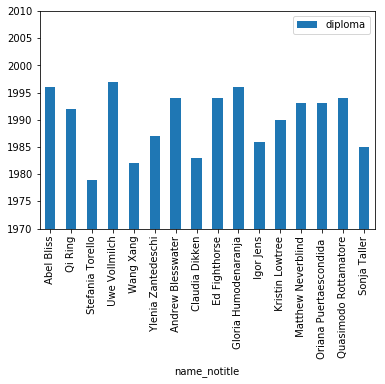

In [27]:
df[['name_notitle', 'diploma']].plot(x='name_notitle', kind='bar')
plt.ylim(1970, 2010)

We can sort the names of the leader by the year they obtained thir diploma: 

In [28]:
df.sort_values('diploma')['name_notitle']

2             Stefania Torello
4                    Wang Xang
7               Claudia Dikken
15                Sonja Taller
10                   Igor Jens
5           Ylenia Zantedeschi
11             Kristin Lowtree
1                      Qi Ring
12          Matthew Neverblind
13     Oriana Puertaescondida 
6            Andrew Blesswater
8                Ed Fighthorse
14       Quasimodo Rottamatore
0                   Abel Bliss
9         Gloria Humodenaranja
3                Uwe Vollmilch
Name: name_notitle, dtype: object

And plot it:

(1970, 2010)

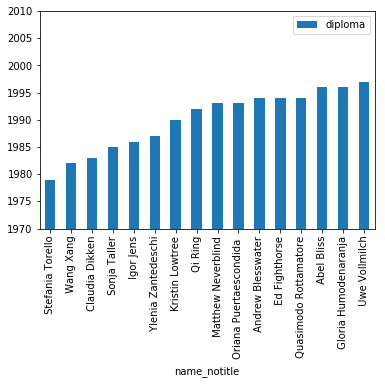

In [29]:
df.sort_values('diploma')[['name_notitle', 'diploma']].plot(x='name_notitle', kind='bar')
plt.ylim(1970, 2010)

For the years of Phd defence we are going to use a bit more advance method, using [regular expressions](https://docs.python.org/3/howto/regex.html). In essence we are going to search for pattern in each string, and the pattern will be just any number of consequtive numbers, whic in our case can only be a year:

In [30]:
years = df.education.str.extractall('(\d+)')

The resulting table below show occurencies of the number sequences and the numbers themselves. Note that for one of the project leaders we have 3 numbers, since `Venia Legendi` is also included:

In [31]:
years

0
   match      
0  0      1996
   1      2000
1  0      1992
   1      1995
2  0      1979
   1      1983
3  0      1997
   1      2000
4  0      1982
   1      1988
5  0      1987
   1      1994
6  0      1994
   1      1998
7  0      1983
   1      1987
8  0      1994
   1      1997
9  0      1996
   1      2001
10 0      1986
   1      1991
11 0      1990
   1      1994
12 0      1993
   1      1998
13 0      1993
   1      1998
14 0      1994
   1      1997
15 0      1985
   1      1990
   2      1996

We would need only the second number, which is the year of the PhD:

In [32]:
years.xs(1, level='match')

,0
0,2000
1,1995
2,1983
3,2000
4,1988
5,1994
6,1998
7,1987
8,1997
9,2001


Add new column to our DataFrame:

In [33]:
df['phd'] = years.xs(1, level='match').astype('int')

Do some useless analysis :)

(1970, 2010)

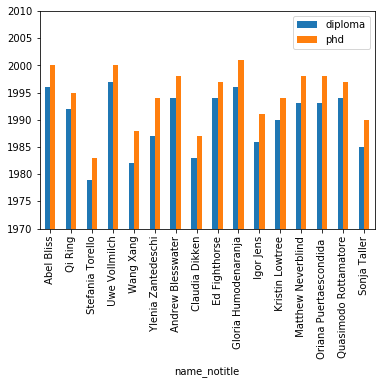

In [34]:
df[['name_notitle','diploma', 'phd']].plot(x='name_notitle', kind='bar')
plt.ylim(1970, 2010)

Sort:

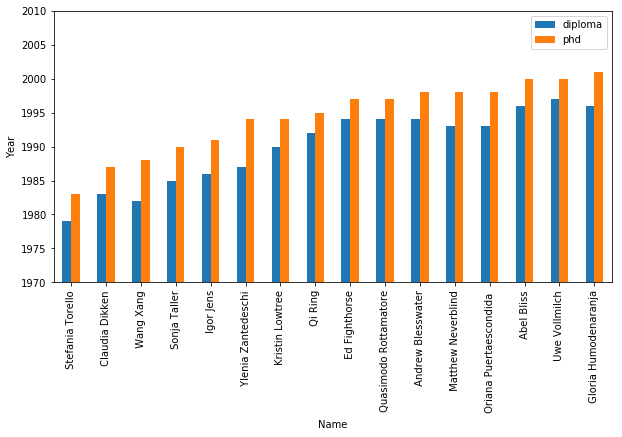

In [35]:
df.sort_values('phd')[['name_notitle', 'diploma', 'phd']].plot(x='name_notitle', kind='bar', figsize=(10,5))
plt.ylim(1970, 2010)
plt.xlabel('Name')
plt.ylabel('Year')

We can have a look at the difference between the year of Diploma and PhD defence:

In [36]:
df['dpdiff'] = (df['phd']-df['diploma'])

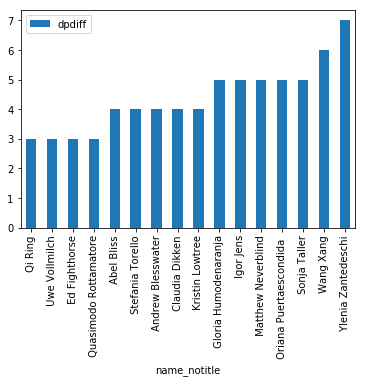

In [37]:
df.sort_values('dpdiff')[['name_notitle','dpdiff']].plot(x='name_notitle', kind='bar')

Extract H-index, also using regular expressions:

In [38]:
df.expertise.str.extract('(h-index .. \d{2,})', expand=True)

,0
0,h-index of 25
1,h-index of 40
2,h-index of 40
3,h-index of 29
4,h-index of 41
5,h-index of 32
6,h-index of 24
7,h-index is 62
8,h-index of 22
9,h-index of 12


Strip the text part, leaving only the number

In [39]:
df.expertise.str.extract('(h-index .. \d{2,})', expand=True)[0].str.extract('(\d+)', expand=True)

,0
0,25
1,40
2,40
3,29
4,41
5,32
6,24
7,62
8,22
9,12


Add it to the DataFrame

In [40]:
df['h-index'] = df.expertise.str.extract('(h-index .. \d{2,})', expand=True)[0].str.extract('(\d+)', expand=True).astype('int')

Have fun with some plots :)

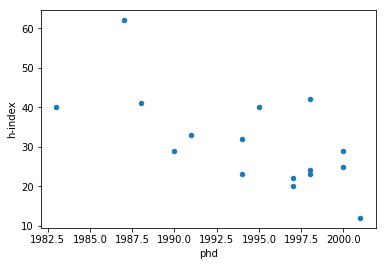

In [41]:
df.plot.scatter('phd','h-index')

In [42]:
import seaborn as sns

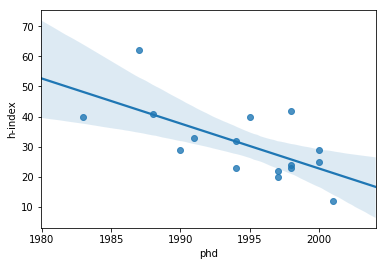

In [43]:
sns.regplot('phd','h-index', df)

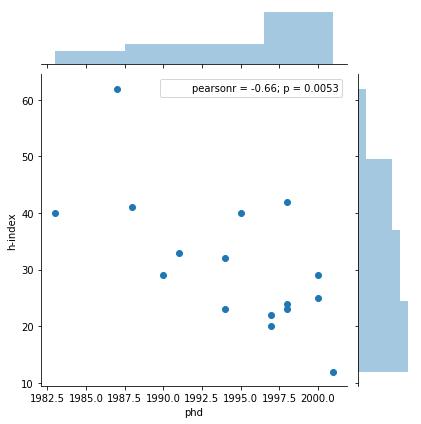

In [44]:
sns.jointplot('phd','h-index', df, )